C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

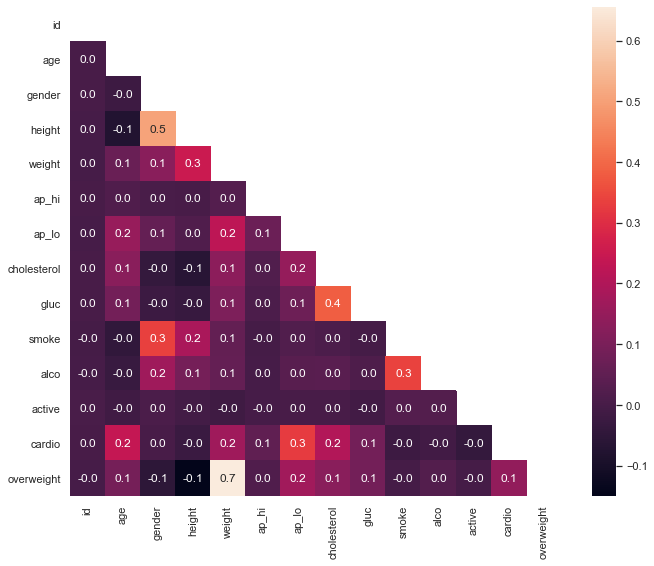

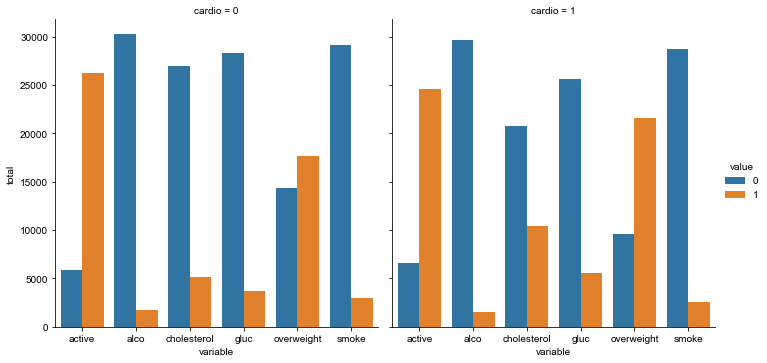

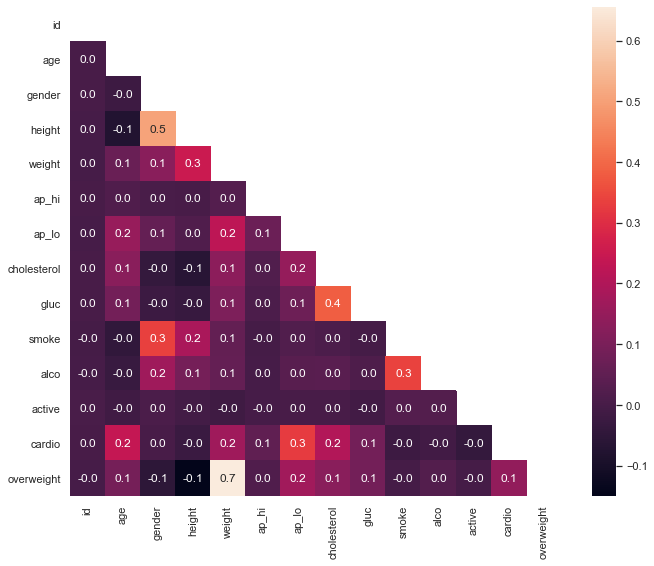

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv', index_col=0)

# Add 'overweight' column
# df['overweight'] = None

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['overweight'] = 0
df['overweight'].loc[(df['weight']/((df['height']/100)**2) > 25)] = 1
df['gluc'].loc[df['gluc'] == 1] = 0
df['gluc'].loc[(df['gluc']==2) | (df['gluc']==3)] = 1
df['cholesterol'].loc[df['cholesterol'] == 1] = 0
df['cholesterol'].loc[(df['cholesterol']==2) | (df['cholesterol']==3)] = 1

df.drop( 
        index = df
        [
            ~(df['ap_hi'] >= df['ap_lo']) |
            ~(df['height'] >= df['height'].quantile(0.025)) |
            ~(df['height'] <= df['height'].quantile(0.975)) |
            ~(df['weight'] >= df['weight'].quantile(0.025)) |
            ~(df['weight'] <= df['weight'].quantile(0.975))
        ].index,
    inplace=True
       )

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    col_list = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke' ]
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=col_list)
    
    dfo = df_cat.groupby('cardio')
    df_tmp = pd.DataFrame()
    for k,v in dfo:
        vc = dfo.get_group(k).value_counts()
        for val,cnt in vc.iteritems():
            df_tmp = df_tmp.append({'cardio':k,'variable':val[1], 'value':val[2], 'total':cnt}, ignore_index=True)
    
    df_tmp['cardio'] = pd.to_numeric(df_tmp['cardio'], downcast='integer') 
    df_tmp['value'] = pd.to_numeric(df_tmp['value'], downcast='integer') 
    
    g = sns.catplot(x="variable", kind="bar", hue="value", y="total", col="cardio", order=col_list, data=df_tmp)

      # https://forum.freecodecamp.org/t/fcc-medical-data-visualizer/408460
    fig = g.fig # g = FacetGrid object

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    sns.set_theme(style="white")
    # Clean the data
    df_heat = df.copy()
    df_heat.reset_index(inplace=True)
    


    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

# Generate a custom diverging colormap
#     cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
    
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(ax=ax, data = corr, annot= True, fmt='.1f', mask=mask)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()

In [70]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63259 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63259 non-null  int64  
 1   gender       63259 non-null  int64  
 2   height       63259 non-null  int64  
 3   weight       63259 non-null  float64
 4   ap_hi        63259 non-null  int64  
 5   ap_lo        63259 non-null  int64  
 6   cholesterol  63259 non-null  int64  
 7   gluc         63259 non-null  int64  
 8   smoke        63259 non-null  int64  
 9   alco         63259 non-null  int64  
 10  active       63259 non-null  int64  
 11  cardio       63259 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [32]:
df.size
df.shape

(63259, 12)

In [39]:
df = pd.read_csv('medical_examination.csv', index_col=0)

# Add 'overweight' column
# df['overweight'] = None

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['overweight'] = 0
df['overweight'].loc[(df['weight']/((df['height']/100)**2) > 25)] = 1
df['gluc'].loc[df['gluc'] == 1] = 0
df['gluc'].loc[(df['gluc']==2) | (df['gluc']==3)] = 1
df['cholesterol'].loc[df['cholesterol'] == 1] = 0
df['cholesterol'].loc[(df['cholesterol']==2) | (df['cholesterol']==3)] = 1

df.drop( 
        index = df
        [
            ~(df['ap_hi'] >= df['ap_lo']) |
            ~(df['height'] >= df['height'].quantile(0.025)) |
            ~(df['height'] <= df['height'].quantile(0.975)) |
            ~(df['weight'] >= df['weight'].quantile(0.025)) |
            ~(df['weight'] <= df['weight'].quantile(0.975))
        ].index,
    inplace=True
       )

C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [54]:
col_list = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke' ]
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=col_list)
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
379549,1,smoke,0
379550,1,smoke,0
379551,0,smoke,1
379552,1,smoke,0


In [55]:
dfo = df_cat.groupby('cardio')
dfo

In [56]:
df_tmp = pd.DataFrame()

In [59]:
for k,v in dfo:
    print(k)
    print(v)
    vc = dfo.get_group(k).value_counts()
    print(vc)
    for val,cnt in vc.iteritems():
        df_tmp = df_tmp.append({'cardio':k,'variable':val[1], 'value':val[2], 'total':cnt}, ignore_index=True)

0
        cardio variable  value
0            0   active      1
4            0   active      0
5            0   active      0
6            0   active      1
8            0   active      1
...        ...      ...    ...
379543       0    smoke      0
379544       0    smoke      0
379547       0    smoke      0
379551       0    smoke      1
379553       0    smoke      0

[192198 rows x 3 columns]
cardio  variable     value
0       alco         0        30270
        smoke        0        29088
        gluc         0        28311
        cholesterol  0        26934
        active       1        26205
        overweight   1        17709
                     0        14324
        active       0         5828
        cholesterol  1         5099
        gluc         1         3722
        smoke        1         2945
        alco         1         1763
dtype: int64
1
        cardio variable  value
1            1   active      1
2            1   active      0
3            1   active      1
7

In [60]:
df_tmp

,cardio,total,value,variable
0,0.0,30270.0,0.0,alco
1,0.0,29088.0,0.0,smoke
2,0.0,28311.0,0.0,gluc
3,0.0,26934.0,0.0,cholesterol
4,0.0,26205.0,1.0,active
5,0.0,17709.0,1.0,overweight
6,0.0,14324.0,0.0,overweight
7,0.0,5828.0,0.0,active
8,0.0,5099.0,1.0,cholesterol
9,0.0,3722.0,1.0,gluc


In [62]:
df_tmp['cardio'] = pd.to_numeric(df_tmp['cardio'], downcast='integer') 
df_tmp['value'] = pd.to_numeric(df_tmp['value'], downcast='integer')  

In [63]:
df_tmp

,cardio,total,value,variable
0,0,30270.0,0,alco
1,0,29088.0,0,smoke
2,0,28311.0,0,gluc
3,0,26934.0,0,cholesterol
4,0,26205.0,1,active
5,0,17709.0,1,overweight
6,0,14324.0,0,overweight
7,0,5828.0,0,active
8,0,5099.0,1,cholesterol
9,0,3722.0,1,gluc
